# Assignment 3
Author: Anna Lozenko

Create a pie chart of peoples email domains from this [URL](https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download)

In [24]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file = "people-1000.csv"
data = pd.read_csv(file)
print(data.head(5))

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


In [11]:
print(data["Email"].head(4))

0              pwarner@example.org
1    fergusonkatherine@example.net
2              fhoward@example.org
3            zjohnston@example.com
Name: Email, dtype: object


In [13]:
# add a new column for email domains
data["Domains"] = data["Email"].str.split("@").str[1]
print(data.head())

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title      Domains  
0         Probation officer  example.org  
1                    Dancer  example.net  
2                      Copy  example.org  
3  Counselling psychologist  example.com  
4       Biomedi

In [14]:
print(data["Domains"].head())

0    example.org
1    example.net
2    example.org
3    example.com
4    example.net
Name: Domains, dtype: object


In [30]:
domain_counts= data["Domains"].value_counts()
print(domain_counts)

Domains
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


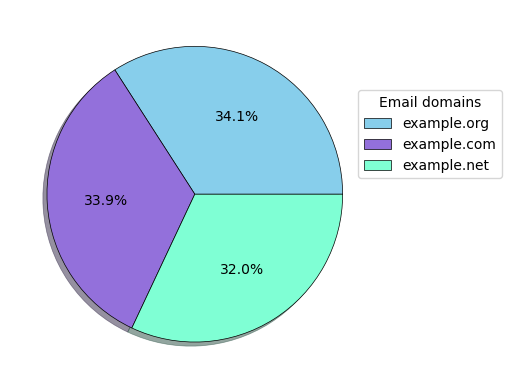

In [68]:
fig, ax = plt.subplots()
#define labels
labels = ["example.org", "example.com", "example.net"]
#define colors
colors = ["skyblue", "mediumpurple", "aquamarine"]
#set borders for edges
wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.5,
                      'antialiased': True}
#create the plot
ax.pie(domain_counts,
       colors=colors, shadow=True, autopct="%1.1f%%", wedgeprops=wedgeprops);
#create the legend and modify its position
plt.legend(title = "Email domains", labels=labels, loc='best', bbox_to_anchor=(0.85, 0.3, 0.5, 0.5));
plt.show()
